<a href="https://colab.research.google.com/github/HashemQJ/Intro-to-ML/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

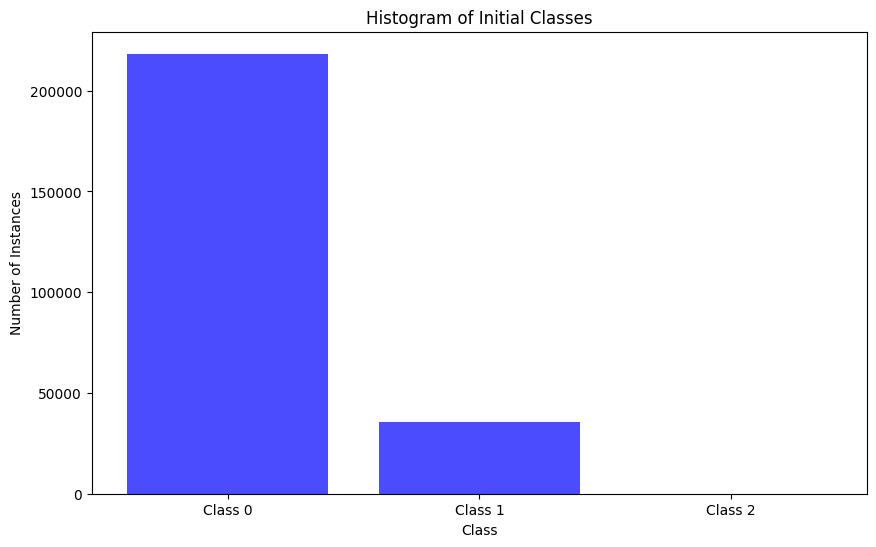

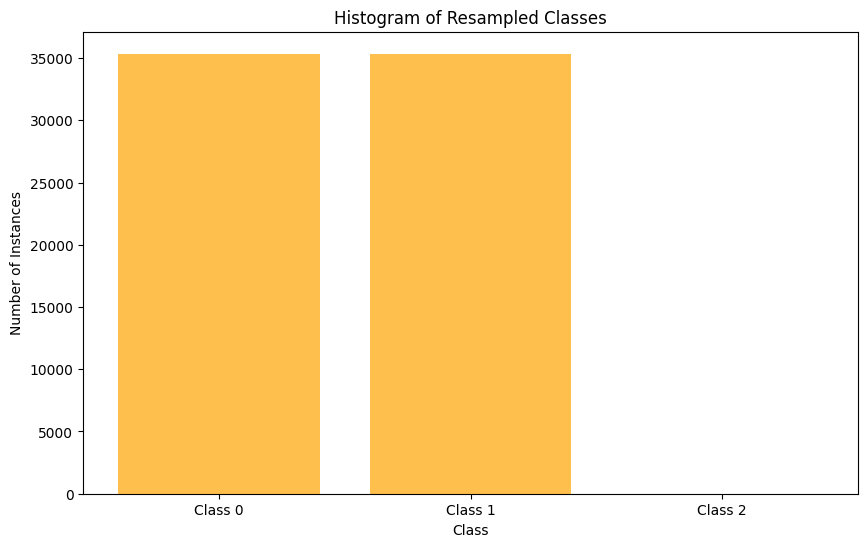

Original class distribution: Counter({'Diabetes_binary': 1})
Resampled class distribution: Counter({'Diabetes_binary': 1})


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


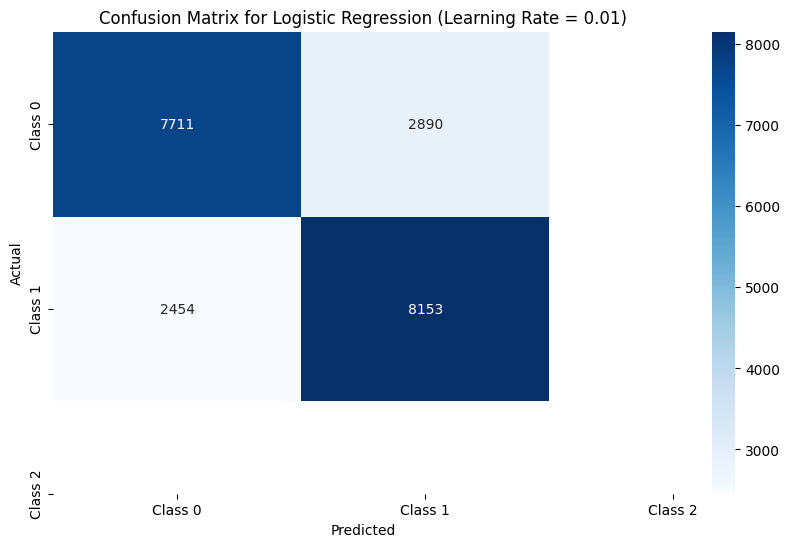

Classification Report for Logistic Regression (Learning Rate = 0.01):
              precision    recall  f1-score   support

           0       0.76      0.73      0.74     10601
           1       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


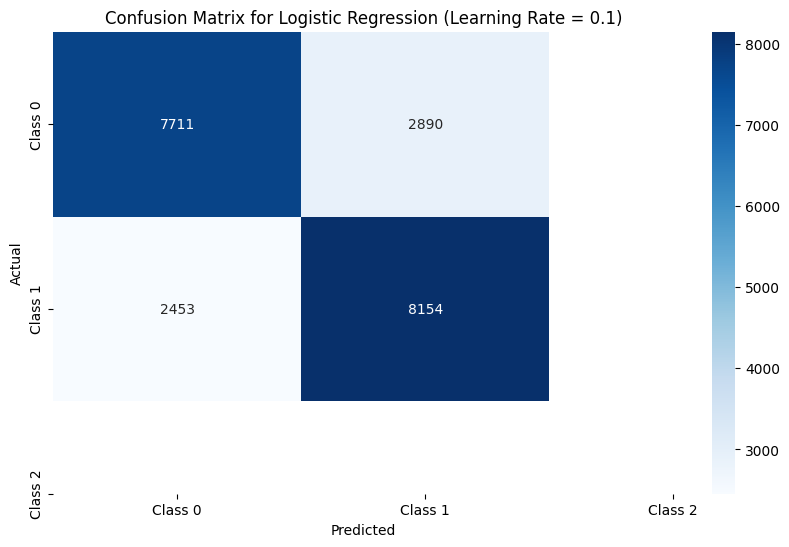

Classification Report for Logistic Regression (Learning Rate = 0.1):
              precision    recall  f1-score   support

           0       0.76      0.73      0.74     10601
           1       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


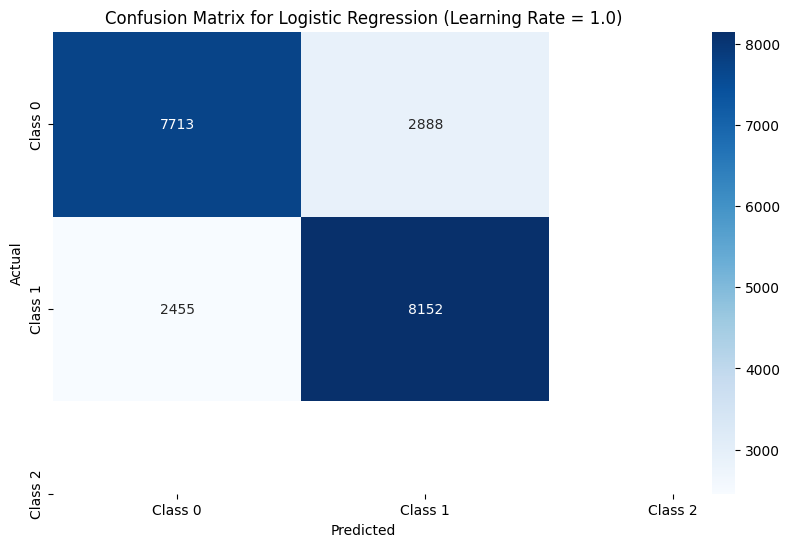

Classification Report for Logistic Regression (Learning Rate = 1.0):
              precision    recall  f1-score   support

           0       0.76      0.73      0.74     10601
           1       0.74      0.77      0.75     10607

    accuracy                           0.75     21208
   macro avg       0.75      0.75      0.75     21208
weighted avg       0.75      0.75      0.75     21208



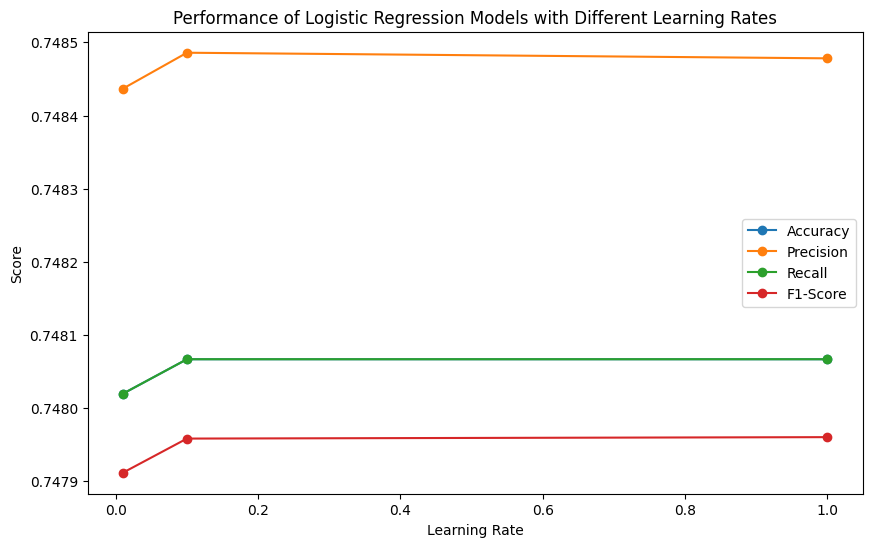

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from ucimlrepo import fetch_ucirepo
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Fetch the dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# Extract features and targets
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets


# Print the histogram of the initial classes
plt.figure(figsize=(10, 6))
plt.hist(y, bins=range(4), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title("Histogram of Initial Classes")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Print the histogram of the resampled classes
plt.figure(figsize=(10, 6))
plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='orange', alpha=0.7)
plt.title("Histogram of Resampled Classes")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(3), ['Class 0', 'Class 1', 'Class 2'])
plt.show()

# Display class distribution before and after undersampling
print(f'Original class distribution: {Counter(y)}')
print(f'Resampled class distribution: {Counter(y_resampled)}')

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Train Logistic Regression models with different learning rates
learning_rates = [0.01, 0.1, 1.0]
log_reg_models = []
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': []}

for lr in learning_rates:
    model = LogisticRegression(C=1/lr, solver='lbfgs', max_iter=1000, random_state=42, multi_class='ovr')
    model.fit(X_train, y_train)
    log_reg_models.append(model)
    y_pred = model.predict(X_test)
    metrics['accuracy'].append(accuracy_score(y_test, y_pred))
    metrics['precision'].append(precision_score(y_test, y_pred, average='weighted'))
    metrics['recall'].append(recall_score(y_test, y_pred, average='weighted'))
    metrics['f1'].append(f1_score(y_test, y_pred, average='weighted'))

    # Plot confusion matrix for each learning rate
    plt.figure(figsize=(10, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
    plt.title(f'Confusion Matrix for Logistic Regression (Learning Rate = {lr})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print classification report for each learning rate
    print(f'Classification Report for Logistic Regression (Learning Rate = {lr}):\n{classification_report(y_test, y_pred)}')

# Plot the metrics of Logistic Regression models in a single graph
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, metrics['accuracy'], marker='o', label='Accuracy')
plt.plot(learning_rates, metrics['precision'], marker='o', label='Precision')
plt.plot(learning_rates, metrics['recall'], marker='o', label='Recall')
plt.plot(learning_rates, metrics['f1'], marker='o', label='F1-Score')
plt.title("Performance of Logistic Regression Models with Different Learning Rates")
plt.xlabel("Learning Rate")
plt.ylabel("Score")
plt.legend()
plt.show()
